In [9]:
# imports
import networkx as nx
import scipy.stats as stats
import numpy as np
import itertools
import matplotlib.pyplot as plt
import collections
import warnings
import sys
warnings.filterwarnings('ignore')

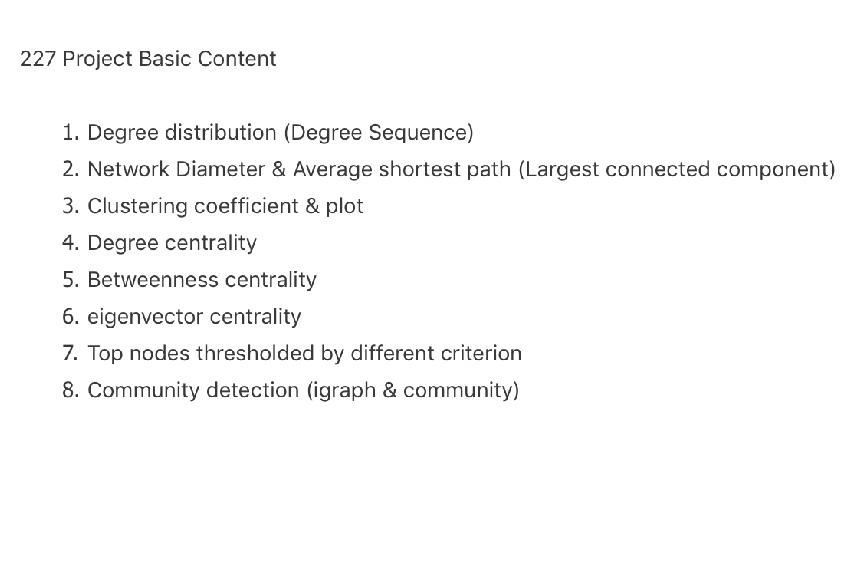

In [16]:
from PIL import Image
img = Image.open('../../Network-Analysis-of-Animals/Content.png')
fig = plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(img)
plt.show()

In [19]:
g1 = nx.read_graphml('Data/rhesusmacaque_dominance_weighted/weighted_macaque_dominance.graphml')
print(nx.info(g1))

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 1167
Average degree:  37.6452


### Degree distribution

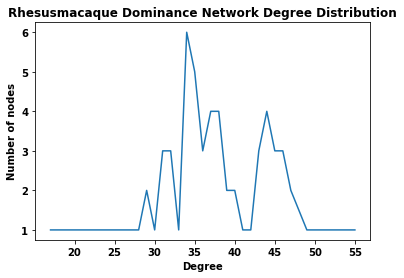

In [20]:
g1_degrees = g1.degree() # dictionary node:degree
g1_values = sorted(set(list(dict(g1_degrees).values()))) 
g1_hist = [list(dict(g1_degrees).values()).count(x) for x in g1_values]

plt.figure()
plt.plot(g1_values,g1_hist) # degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Rhesusmacaque Dominance Network Degree Distribution')
plt.show()

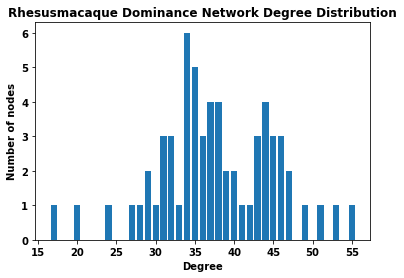

In [21]:
plt.figure()
plt.bar(g1_values,g1_hist) # degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Rhesusmacaque Dominance Network Degree Distribution')
plt.show()

### Diameter & Average shortest path

In [23]:
g1_diameter = nx.diameter(g1)
print('Rhesusmacaque Dominance Network\'s diameter:', g1_diameter)
g1_average_shortest_path = nx.average_shortest_path_length(g1)
print('Rhesusmacaque Dominance Network\'s average shortest path:', g1_average_shortest_path)

Rhesusmacaque Dominance Network's diameter: 2
Rhesusmacaque Dominance Network's average shortest path: 1.3828662083553676


### Clustering coeff

In [24]:
g1_clustering_coeff = nx.clustering(g1)

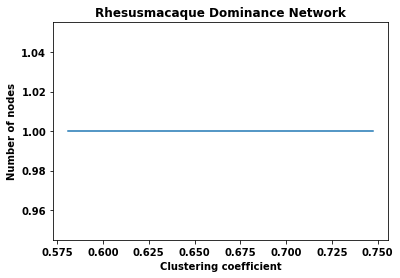

In [35]:
g1_clustering_coeff_unique_value = sorted(set(list(dict(g1_clustering_coeff).values()))) 
g1_clustering_coeff_hist = [list(dict(g1_clustering_coeff).values()).count(x) for x in g1_clustering_coeff_unique_value]
plt.figure()
plt.plot(g1_clustering_coeff_unique_value,g1_clustering_coeff_hist) # coefficient
plt.xlabel('Clustering coefficient')
plt.ylabel('Number of nodes')
plt.title('Rhesusmacaque Dominance Network')
plt.show()

### Degree centrality

In [28]:
g1_degree_centrality = nx.degree_centrality(g1)

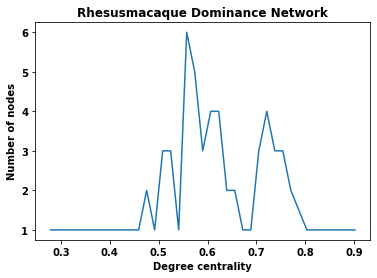

In [34]:
g1_degree_centrality_unique_value = sorted(set(list(dict(g1_degree_centrality).values()))) 
g1_degree_centrality_hist = [list(dict(g1_degree_centrality).values()).count(x) for x in g1_degree_centrality_unique_value]
plt.figure()
plt.plot(g1_degree_centrality_unique_value,g1_degree_centrality_hist) # degree centrality
plt.xlabel('Degree centrality')
plt.ylabel('Number of nodes')
plt.title('Rhesusmacaque Dominance Network')
plt.show()

### Betweenness centrality

In [36]:
g1_betweenness_centrality = nx.betweenness_centrality(g1)

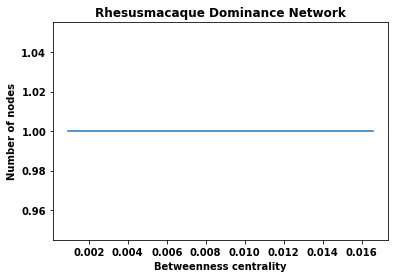

In [37]:
g1_betweenness_centrality_unique_value = sorted(set(list(dict(g1_betweenness_centrality).values()))) 
g1_betweenness_centrality_hist = [list(dict(g1_betweenness_centrality).values()).count(x) for x in g1_betweenness_centrality_unique_value]
plt.figure()
plt.plot(g1_betweenness_centrality_unique_value,g1_betweenness_centrality_hist) # betweenness centrality
plt.xlabel('Betweenness centrality')
plt.ylabel('Number of nodes')
plt.title('Rhesusmacaque Dominance Network')
plt.show()

In [42]:
nx.set_node_attributes(g1,dict(g1_degrees),'degree')
nx.set_node_attributes(g1,g1_betweenness_centrality,'betweenness')

### Eigenvector centrality

In [38]:
g1_eigenvector_centrality = nx.eigenvector_centrality(g1)

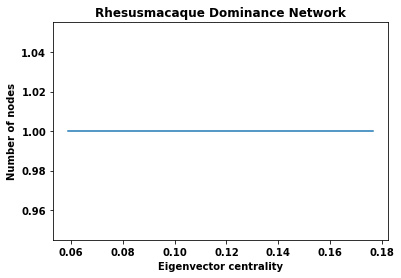

In [39]:
g1_eigenvector_centrality_unique_value = sorted(set(list(dict(g1_eigenvector_centrality).values()))) 
g1_eigenvector_centrality_hist = [list(dict(g1_eigenvector_centrality).values()).count(x) for x in g1_eigenvector_centrality_unique_value]
plt.figure()
plt.plot(g1_eigenvector_centrality_unique_value,g1_eigenvector_centrality_hist) # eigenvector centrality
plt.xlabel('Eigenvector centrality')
plt.ylabel('Number of nodes')
plt.title('Rhesusmacaque Dominance Network')
plt.show()

### Top nodes threshold

In [41]:
def find_top_index(parameter,top):
    deg_array = np.array(list(parameter.items()))[:,1]
    top_idx = np.argpartition(deg_array,int((1-top)*deg_array.shape[0]))[int((1-top)*deg_array.shape[0])-1]
    print(deg_array[top_idx])
g1_degrees = dict(g1_degrees)
find_top_index(g1_degrees,0.2)
find_top_index(g1_degrees,0.1)
find_top_index(g1_degrees,0.05)
find_top_index(g1_degrees,0.01)
find_top_index(g1_betweenness_centrality,0.2)
find_top_index(g1_betweenness_centrality,0.1)
find_top_index(g1_betweenness_centrality,0.05)
find_top_index(g1_betweenness_centrality,0.01)

44
46
47
53
0.008647078011237644
0.010394299661348527
0.0112336308200591
0.013915476508492113


### Community detection

#### 1. use community

In [44]:
import community
g1_partitions = community.best_partition(g1)

In [49]:
np.array(list(g1_partitions.items()),dtype=int)[:,1].max()

2

In [45]:
nx.set_node_attributes(g1,g1_partitions,'community')

In [52]:
g1.node['56']

{'degree': 38, 'betweenness': 0.005164852842031902, 'community': 0}

In [67]:
g1.node['56'].keys()

dict_keys(['degree', 'betweenness', 'community'])

In [68]:
nx.write_graphml(g1,"Rhesusmacaque.graphml")

#### 2. use igraph

In [69]:
import igraph 
g1_igraph = igraph.Graph.Read_GraphML('Rhesusmacaque.graphml')
igraph.summary(g1_igraph)

IGRAPH U-W- 62 1167 -- 
+ attr: betweenness (v), community (v), degree (v), id (v), weight (e)


In [70]:
g1_greedy = g1_igraph.simplify().community_fastgreedy()
g1_greegy_comms = g1_greedy.as_clustering().membership
g1_greedy_5_comms = g1_greedy.as_clustering(5).membership

In [71]:
print("Number of communities for optimmized modularity: "+str(max(g1_greegy_comms)+1))

Number of communities for optimmized modularity: 2


In [72]:
g1_igraph.vs["opted_comms"] = g1_greegy_comms
g1_igraph.vs["5_comms"] = g1_greedy_5_comms
igraph.summary(g1_igraph)

IGRAPH U--- 62 1167 -- 
+ attr: 5_comms (v), betweenness (v), community (v), degree (v), id (v), opted_comms (v)


In [73]:
g1_igraph.write_graphml("Rhesusmacaque_igraph.graphml")